# EDA 목표
### 식별자 id 변수와 종속변수 loss를 제외한 총 변수는 130개<br>
=> 변수가 너무 많으므로 PCA를 이용해서 모델링을 해보자.

In [376]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import os

In [314]:
os.chdir(r"C:\Users\ByungjooCho\Google 드라이브\스터디 프로젝트\allstate-claims-severity")
#os.chdir(r"C:\Users\Master\Google 드라이브\스터디 프로젝트\allstate-claims-severity")

In [315]:
df = pd.read_csv('train.csv', header='infer', encoding='latin1')

In [316]:
df.shape

(188318, 132)

###### 데이터 전체 결측치 확인

In [317]:
df.isnull().sum().sum()

0

In [318]:
X = df.drop(columns=["loss"])
Y = df.loss
header = df.columns
Y.columns=["loss"]

### 변수 변환¶
다음과 같은 경우에는 로그 함수 혹은 제곱근 함수 등을 사용하여 변환된 변수를 사용하면 회귀 성능이 향상될 수도 있다.<br>

독립 변수나 종속 변수가 심하게 한쪽으로 치우친 분포를 보이는 경우<br>
독립 변수와 종속 변수간의 관계가 곱셈 혹은 나눗셉으로 연결된 경우<br>
종속 변수와 예측치가 비선형 관계를 보이는 경우<br>
원래 선형회귀모형의 가정에는 독립 변수나 종속 변수가 반드시 대칭 분포를 보여야 한다는 가정은 없지만<br> 
정규 분포에 가까운 분포를 보일 수록 선형회귀모형의 성능이 좋아지는 경우가 많다.<br>

출처 :  https://datascienceschool.net/view-notebook/afb99de8cc0d407ba32079590b25180d/

In [319]:
loss_log = np.log(df.loss)

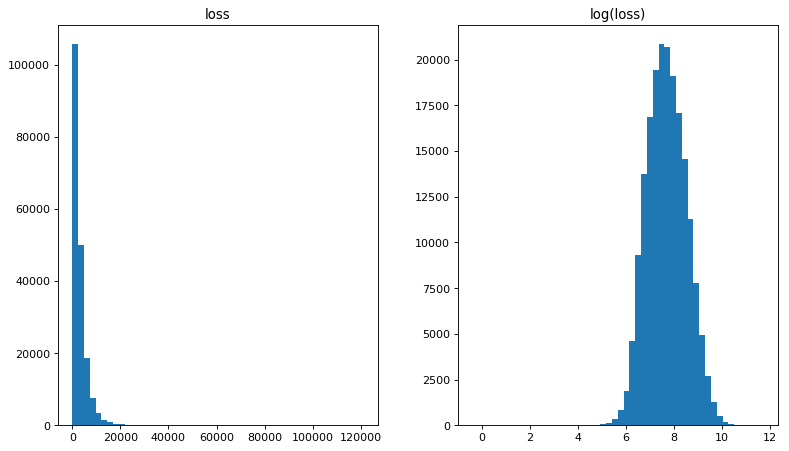

In [320]:
fig0=plt.figure(figsize=(10,5), dpi=80)       
axes1 = fig0.add_axes([0,0,0.4,1])            
axes2 = fig0.add_axes([0.5,0,0.4,1])          
axes1.hist(df.loss, bins =50)  
axes2.hist(loss_log, bins=50)
axes1.set_title('loss')
axes2.set_title('log(loss)')
plt.show()

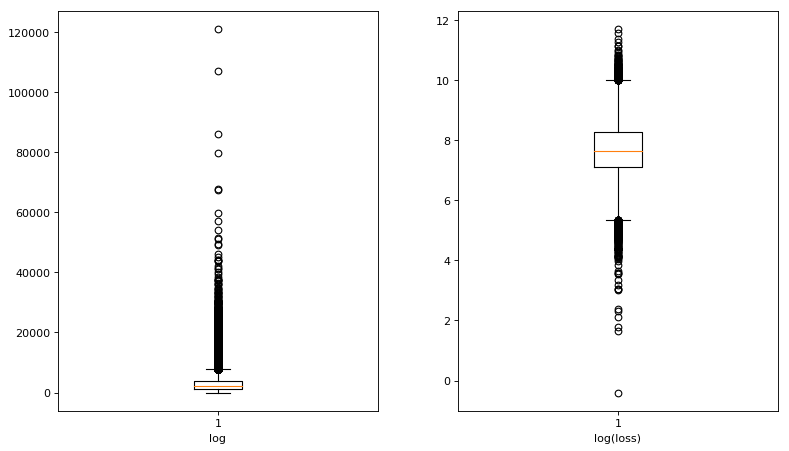

In [321]:
fig0=plt.figure(figsize=(10,5), dpi=80)       
axes1 = fig0.add_axes([0,0,0.4,1])            
axes2 = fig0.add_axes([0.5,0,0.4,1])          
axes1.boxplot(df.loss)  
axes2.boxplot(loss_log)
axes1.set_xlabel('log')
axes2.set_xlabel('log(loss)')

plt.show()

In [322]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

In [323]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(131822, 131)
(56496, 131)
(131822,)
(56496,)


### id 변수는 추후에 모델을 학습할 때는 제외해야하므로 일단 제외.

In [324]:
X_train_id = X_train["id"]
X_train= X_train.drop(columns=["id"])
Y_train= Y_train.drop(columns=["id"])

In [325]:
X_test_id = X_test["id"]
X_test= X_test.drop(columns=["id"])
Y_test= Y_test.drop(columns=["id"])

In [326]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(131822, 130)
(56496, 130)
(131822,)
(56496,)


In [327]:
pd.Series.unique(X_train.iloc[0:,0]) 

array(['A', 'B'], dtype=object)

### cat1 ~ cat116 카테고리의 등급 알아보기
PCA를 사용하기 위해서는 명목형 변수가 있어서는 안됨<br>
그래서 등급에 따라서 점수를 부여하려고 했으나, 데이터 구조상 그럴 수가 없음<br>
=> 더미변수의 필요성

In [181]:
#for i in range(0,116):
#    print(pd.Series.unique(X_train.iloc[0:,i]))

In [182]:
#for i in range(0,116):
#    print(pd.Series.value_counts(X_train.iloc[0:,i]))

In [328]:
X_train.iloc[:,115].values

array(['DJ', 'HA', 'DJ', ..., 'DP', 'CK', 'HL'], dtype=object)

In [329]:
X_train_le=X_train
X_train_le[X_train.columns[0:116]].values

array([['A', 'A', 'A', ..., 'C', 'L', 'DJ'],
       ['A', 'B', 'A', ..., 'A', 'K', 'HA'],
       ['A', 'B', 'A', ..., 'A', 'K', 'DJ'],
       ...,
       ['A', 'B', 'A', ..., 'A', 'P', 'DP'],
       ['B', 'B', 'A', ..., 'A', 'M', 'CK'],
       ['A', 'A', 'A', ..., 'F', 'O', 'HL']], dtype=object)

In [330]:
df1=pd.DataFrame(X_train.iloc[:,0:116])

In [331]:
X=df1['cat1'].values
cat_le =LabelEncoder()
X=cat_le.fit_transform(X)
print(X)

[0 0 0 ... 0 1 0]


In [332]:
X=df1['cat116'].values
cat_le =LabelEncoder()
X=cat_le.fit_transform(X)
print(X)

[ 76 164  76 ...  82  52 175]


### 각 cat변수들의 값 종류

In [333]:
print(pd.unique(X_train['cat116']))
print(len(X_train['cat116'].unique()))

['DJ' 'HA' 'GC' 'DP' 'KR' 'CR' 'IH' 'LI' 'HK' 'CK' 'CB' 'IN' 'IE' 'EC'
 'HG' 'HX' 'GS' 'LO' 'HC' 'HH' 'DC' 'LN' 'HQ' 'EK' 'IT' 'CD' 'LF' 'CM'
 'CP' 'KC' 'LB' 'HN' 'HV' 'MD' 'IF' 'DF' 'GX' 'HB' 'GE' 'LM' 'KW' 'LL'
 'HJ' 'CU' 'CO' 'JX' 'FH' 'GK' 'IQ' 'CN' 'LJ' 'GB' 'BV' 'HL' 'GI' 'EO'
 'HW' 'FC' 'IC' 'FD' 'CT' 'K' 'EI' 'CS' 'ME' 'FR' 'KL' 'EG' 'IG' 'MG' 'DI'
 'E' 'EA' 'CW' 'GP' 'KJ' 'LW' 'CQ' 'BQ' 'JR' 'FE' 'BY' 'GT' 'DK' 'BP' 'HR'
 'GA' 'LV' 'FG' 'DS' 'CH' 'CI' 'EY' 'KA' 'KT' 'HM' 'KN' 'MJ' 'DH' 'FT'
 'JW' 'BD' 'LY' 'EE' 'HE' 'EP' 'KY' 'CC' 'HP' 'GU' 'GO' 'KD' 'MC' 'HI'
 'GN' 'FB' 'CG' 'BX' 'KX' 'LQ' 'GJ' 'LX' 'DD' 'DN' 'LC' 'MP' 'U' 'KP' 'HF'
 'FX' 'FV' 'IR' 'KB' 'MI' 'EH' 'DT' 'DL' 'GW' 'JP' 'GM' 'LD' 'EB' 'AX'
 'DU' 'EL' 'KI' 'MO' 'IY' 'MR' 'LH' 'KQ' 'GL' 'JL' 'FO' 'GF' 'IU' 'AJ'
 'JU' 'DA' 'MU' 'LE' 'ED' 'ID' 'KU' 'FA' 'MK' 'HY' 'EF' 'DX' 'MA' 'CA' 'H'
 'AC' 'LA' 'CL' 'AF' 'ES' 'BO' 'I' 'JM' 'AO' 'EJ' 'GV' 'FF' 'EN' 'AD' 'BF'
 'L' 'JE' 'IP' 'CF' 'FW' 'LU' 'MQ' 'CX' 'JF' 'KE' 'IL' 'I

#### 각 cat변수들 Label-Encoding

In [334]:
a=[]
for i in df1.columns:
    X=df1[i].values
    cat_le =LabelEncoder()
    X=cat_le.fit_transform(X)   
    a=a+[X]
b=np.array(a)

In [335]:
b.shape

(116, 131822)

#### DataFrame으로 만들기 위해서 전치행렬로 바꿔준다.

In [336]:
b=b.T
X_train_cat = pd.DataFrame(b)

In [337]:
X_train_cat

,0,1,2,3,4,5,6,7,8,9,...,106,107,108,109,110,111,112,113,114,115
0,0,0,0,0,0,1,0,0,0,0,...,6,1,31,43,0,30,0,2,11,76
1,0,1,0,0,1,0,0,0,1,0,...,5,1,31,104,0,46,48,0,10,164
2,0,1,0,0,1,0,0,0,1,0,...,5,1,31,58,0,15,48,0,10,76
3,0,1,0,0,0,0,0,0,1,1,...,12,10,31,9,0,31,60,0,16,140
4,0,1,0,0,1,0,0,0,1,0,...,5,1,31,100,0,0,23,0,10,82
5,0,0,0,1,0,0,0,0,0,0,...,5,3,31,13,4,6,45,0,10,250
6,0,1,0,0,1,1,0,0,1,0,...,7,1,31,3,0,8,39,2,11,59
7,0,1,0,0,1,0,0,0,1,1,...,10,10,31,49,0,24,49,0,16,196
8,0,1,0,0,0,0,0,0,1,0,...,10,4,31,43,0,30,12,0,14,266
9,1,0,0,0,1,1,0,0,0,0,...,5,1,2,104,0,14,48,7,10,174


limit_output extension: Maximum message size of 10000 exceeded with 25493 characters

####  cat변수이름 원래대로

In [338]:
a=[]
for i in range(1,117) :
    b= 'cat'+ str(i)   
    a+=[b]
X_train_cat.columns=a
# X_train_cat

### cont변수 부분 확인

In [339]:
X_train.columns[116:130]

Index(['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8',
       'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14'],
      dtype='object')

In [340]:
X_train_cont=X_train[X_train.columns[116:130]].values
print(X_train_cont.shape)
X_train_cont=pd.DataFrame(X_train_cont)
# X_train_cont

(131822, 14)


In [341]:
X_train_cont.columns=df.columns[117:131]
# X_train_cont

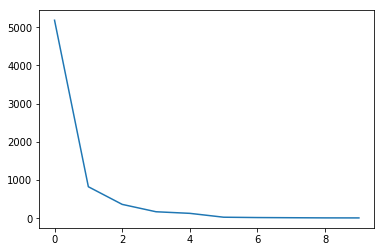

In [342]:
model=PCA(n_components=10)
results = model.fit(X_train_cat)
Z = results.transform(X_train_cat)
plt.plot(results.explained_variance_)
plt.show()

In [343]:
pca = pd.DataFrame(Z)
#pca

In [344]:
X_train_cat=pca.iloc[:,0:2]

In [345]:
X_train = pd.concat([X_train_cat, X_train_cont], axis = 1)
X_train

,0,1,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,-71.952397,32.600510,0.393339,0.555782,0.819748,0.259793,0.397069,0.374877,0.560801,0.31796,0.35897,0.32935,0.472726,0.462286,0.321548,0.812096
1,16.773498,-33.325531,0.493164,0.100099,0.201309,0.821574,0.811271,0.329836,0.259679,0.39455,0.39648,0.32935,0.275431,0.301921,0.295948,0.297212
2,-69.327437,15.601634,0.513457,0.785784,0.549770,0.594598,0.811271,0.421047,0.412356,0.62918,0.50630,0.37493,0.338312,0.331643,0.315758,0.189748
3,-2.720204,61.803332,0.261841,0.299102,0.484196,0.463029,0.534484,0.320802,0.366400,0.81542,0.32128,0.36458,0.457203,0.447145,0.695650,0.740509
4,-66.584598,-25.421576,0.484469,0.620805,0.549770,0.452887,0.499798,0.332963,0.377235,0.58354,0.44352,0.39599,0.341813,0.352251,0.339244,0.399007
5,105.573996,54.947656,0.496063,0.422197,0.654310,0.318422,0.281143,0.510054,0.951754,0.63475,0.53565,0.50556,0.859322,0.848992,0.342239,0.230365
6,-85.004903,71.464632,0.254071,0.422197,0.298977,0.336414,0.482436,0.288198,0.330458,0.29260,0.24958,0.27777,0.180456,0.178698,0.304350,0.252605
7,51.021692,20.509496,0.367378,0.061000,0.139862,0.493605,0.288217,0.593046,0.425740,0.67263,0.39648,0.25604,0.415029,0.443374,0.633362,0.333068
8,118.478061,25.795074,0.458463,0.785784,0.654310,0.259793,0.397069,0.890740,0.966972,0.29260,0.41675,0.68520,0.927095,0.920142,0.731059,0.807032
9,26.201157,-33.955485,0.634734,0.620805,0.397983,0.869299,0.845727,0.456654,0.423280,0.36083,0.46853,0.51666,0.527274,0.515644,0.363547,0.258764


limit_output extension: Maximum message size of 10000 exceeded with 26454 characters

### test 데이터도 전처리해주기

In [346]:
X_test.shape

(56496, 130)

In [347]:
df2=pd.DataFrame(X_test.iloc[:,0:116])
df2.shape

(56496, 116)

In [353]:
a=[]
for i in df2.columns:
    X=df2[i].values
    cat_le =LabelEncoder()
    X=cat_le.fit_transform(X)   
    a=a+[X]
b=np.array(a)

In [354]:
b=b.T
X_test_cat = pd.DataFrame(b)
X_test_cat

,0,1,2,3,4,5,6,7,8,9,...,106,107,108,109,110,111,112,113,114,115
0,0,1,0,1,0,0,0,0,1,1,...,3,1,28,90,2,8,42,0,6,156
1,1,0,0,0,0,1,0,0,0,0,...,11,4,28,50,0,1,12,3,14,214
2,0,1,0,0,0,0,0,0,1,0,...,6,1,2,40,0,35,32,0,8,41
3,0,1,0,0,0,0,0,0,1,0,...,10,10,28,57,0,23,3,0,11,146
4,1,0,0,0,1,0,0,0,0,0,...,6,1,28,90,0,35,33,0,8,79
5,0,0,0,1,0,0,0,0,0,0,...,6,1,28,3,4,8,33,0,9,77
6,1,0,0,0,0,1,0,0,0,0,...,5,1,55,53,0,22,20,3,8,69
7,0,0,0,1,1,0,0,0,0,0,...,5,7,2,53,7,50,51,0,6,161
8,1,0,0,1,0,0,0,0,0,0,...,6,7,28,86,2,46,3,0,5,47
9,0,0,0,0,0,1,0,0,0,0,...,9,10,28,56,0,28,8,3,13,154


limit_output extension: Maximum message size of 10000 exceeded with 25443 characters

In [360]:
a=[]
for i in range(1,117) :
    b= 'cat'+ str(i)   
    a+=[b]
X_test_cat.columns=a

In [361]:
X_test.columns[116:130]
X_test_cont=X_test[X_test.columns[116:130]].values
print(X_test_cont.shape)
X_test_cont=pd.DataFrame(X_test_cont)
X_test_cont.columns=df.columns[117:131]


(56496, 14)


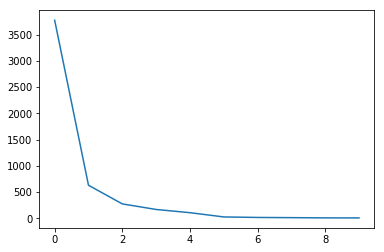

In [362]:
model=PCA(n_components=10)
results = model.fit(X_test_cat)
Z = results.transform(X_test_cat)
plt.plot(results.explained_variance_)
plt.show()

In [363]:
pca = pd.DataFrame(Z)
pca

,0,1,2,3,4,5,6,7,8,9
0,32.818899,-29.833594,-10.379045,-16.377269,3.563883,7.842461,7.309370,3.432312,-1.900005,-2.472837
1,90.118097,10.025709,20.918666,-22.902781,-4.041598,-2.137373,-2.449288,-1.171458,5.579998,-1.912741
2,-81.287449,23.343702,-16.405388,11.507405,-20.393928,0.875096,1.362893,-3.187541,-0.551706,-1.500391
3,21.616537,5.383208,25.123581,-0.592225,-3.363656,-6.007082,0.025421,2.927665,5.288548,1.632211
4,-44.439269,-27.206043,-7.190273,10.985037,4.619804,2.743864,-3.791617,1.876301,1.092823,-1.347284
5,-43.694679,59.829935,-11.576695,-15.525309,3.719585,2.294753,-2.077308,-0.741570,-2.019282,-1.649176
6,-53.636506,11.276298,8.134763,-1.604291,28.590048,3.201235,-5.792694,4.306016,-3.249433,-1.511330
7,39.380167,5.731012,-26.433370,25.675843,-20.567082,6.491465,-2.639044,0.569232,-3.258537,9.401540
8,-78.256505,-20.752013,19.603682,22.703635,-0.123862,3.720573,-2.018195,-1.322833,-1.802220,9.906627
9,30.009319,5.851986,20.667513,4.345416,-2.610557,-6.518540,-0.319960,-4.725292,-0.894552,1.018768


limit_output extension: Maximum message size of 10000 exceeded with 18016 characters

In [364]:
X_test_cat=pca.iloc[:,0:2]

In [365]:
X_test = pd.concat([X_test_cat, X_test_cont], axis = 1)

### 선형회귀 모델 만들기

In [366]:
lm = LinearRegression()

In [401]:
lm.fit(X_train, Y_train)
Y_pred_test = lm.predict(X_test)

####  MSE, RMSE

In [396]:
print('MSE : ' + str(metrics.mean_squared_error(Y_test, Y_pred_test)))
print('RMSE : ' + str(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_test))))

MSE : 8253722.521045319
RMSE : 2872.929257925666


#### 잔차

In [397]:
Y_train.size

131822

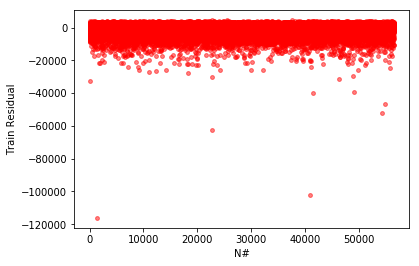

In [398]:
plt.scatter(np.arange(Y_test.size),Y_pred_test-Y_test,c = 'red', s=15, alpha=0.5)
plt.xlabel('N#')
plt.ylabel('Train Residual')
plt.show()

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


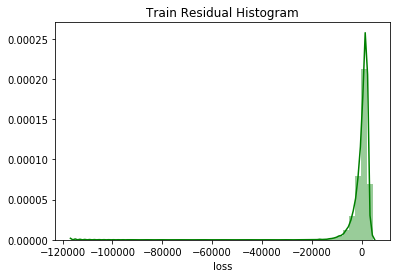

In [399]:
sns.distplot((Y_pred_test-Y_test), bins=50, color='green').set_title("Train Residual Histogram")
plt.show()

#### 결정계수

In [400]:
lm.score(X_train, Y_train)

0.04015854157303378